# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units,activation="softmax",name="output")(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
learningRate=[1e-1,1e-2,1e-3,1e-4,1e-5]
epochs=100
batch_size=256
momentum=0.95


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learningRate:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer=keras.optimizers.SGD(lr=lr,nesterov=True,momentum=momentum)
    model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

Epoch 48/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.4349 - acc: 0.4996 - val_loss: 1.6910 - val_acc: 0.4248
Epoch 49/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.4513 - acc: 0.4950 - val_loss: 1.6442 - val_acc: 0.4245
Epoch 50/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.4535 - acc: 0.4930 - val_loss: 1.6628 - val_acc: 0.4300
Epoch 51/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.4387 - acc: 0.4963 - val_loss: 1.6344 - val_acc: 0.4531
Epoch 52/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.4340 - acc: 0.4984 - val_loss: 1.6450 - val_acc: 0.4381
Epoch 53/100
50000/50000 [==============================] - 8s 163us/step - loss: 1.4353 - acc: 0.5010 - val_loss: 1.6973 - val_acc: 0.4282
Epoch 54/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.4326 - acc: 0.4980 - val_loss: 1.6668 - val_acc: 0.4324
Epoch 55/100
50000/5

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 193us/step - loss: 1.8391 - acc: 0.3402 - val_loss: 1.6764 - val_acc: 0.3973
Epoch 2/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.6093 - acc: 0.4294 - val_loss: 1.5599 - val_acc: 0.4463
Epoch 3/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.5190 - acc: 0.4611 - val_loss: 1.5557 - val_acc: 0.4464
Epoch 4/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.4549 - acc: 0.4846 - val_loss: 1.5023 - val_acc: 0.4690
Epoch 5/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.4032 - acc: 0.5036 - val_loss: 1.4287 - val_acc: 0.4918
Epoch 6/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.3622 - acc: 0.5163 - val_loss: 1.4113 - val_acc: 0.5013
Epoch 7/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.3289 - acc: 0.5276 - val_loss: 1

50000/50000 [==============================] - 9s 174us/step - loss: 0.3122 - acc: 0.8888 - val_loss: 2.5980 - val_acc: 0.5158
Epoch 60/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.2887 - acc: 0.8978 - val_loss: 2.5663 - val_acc: 0.5160
Epoch 61/100
50000/50000 [==============================] - 9s 180us/step - loss: 0.2869 - acc: 0.8964 - val_loss: 2.6545 - val_acc: 0.5203
Epoch 62/100
50000/50000 [==============================] - 9s 173us/step - loss: 0.2716 - acc: 0.9016 - val_loss: 2.6070 - val_acc: 0.5212
Epoch 63/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.2849 - acc: 0.8981 - val_loss: 2.6735 - val_acc: 0.5238
Epoch 64/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.2660 - acc: 0.9045 - val_loss: 2.6534 - val_acc: 0.5210
Epoch 65/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.2568 - acc: 0.9078 - val_loss: 2.7405 - val_acc: 0.5259
Epoch 66/100
50000/50000 [=======

50000/50000 [==============================] - 8s 169us/step - loss: 1.4812 - acc: 0.4802 - val_loss: 1.5031 - val_acc: 0.4660
Epoch 10/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.4558 - acc: 0.4891 - val_loss: 1.5032 - val_acc: 0.4697
Epoch 11/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.4325 - acc: 0.4967 - val_loss: 1.4694 - val_acc: 0.4831
Epoch 12/100
50000/50000 [==============================] - 9s 174us/step - loss: 1.4094 - acc: 0.5071 - val_loss: 1.4751 - val_acc: 0.4762
Epoch 13/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.3861 - acc: 0.5114 - val_loss: 1.4305 - val_acc: 0.4983
Epoch 14/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.3656 - acc: 0.5202 - val_loss: 1.4363 - val_acc: 0.4946
Epoch 15/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.3452 - acc: 0.5275 - val_loss: 1.4136 - val_acc: 0.5029
Epoch 16/100
50000/50000 [=======

50000/50000 [==============================] - 9s 180us/step - loss: 0.6669 - acc: 0.7694 - val_loss: 1.5101 - val_acc: 0.5330
Epoch 68/100
50000/50000 [==============================] - 9s 181us/step - loss: 0.6580 - acc: 0.7716 - val_loss: 1.5389 - val_acc: 0.5214
Epoch 69/100
50000/50000 [==============================] - 9s 180us/step - loss: 0.6421 - acc: 0.7773 - val_loss: 1.9014 - val_acc: 0.4823
Epoch 70/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.6352 - acc: 0.7786 - val_loss: 1.6451 - val_acc: 0.5097
Epoch 71/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.6275 - acc: 0.7815 - val_loss: 1.6141 - val_acc: 0.5226
Epoch 72/100
50000/50000 [==============================] - 9s 181us/step - loss: 0.6143 - acc: 0.7883 - val_loss: 1.6359 - val_acc: 0.5136
Epoch 73/100
50000/50000 [==============================] - 9s 181us/step - loss: 0.5968 - acc: 0.7935 - val_loss: 1.7080 - val_acc: 0.4977
Epoch 74/100
50000/50000 [=======

Epoch 18/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.7569 - acc: 0.3904 - val_loss: 1.7576 - val_acc: 0.3864
Epoch 19/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.7478 - acc: 0.3939 - val_loss: 1.7491 - val_acc: 0.3913
Epoch 20/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.7394 - acc: 0.3962 - val_loss: 1.7416 - val_acc: 0.3953
Epoch 21/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.7308 - acc: 0.4007 - val_loss: 1.7341 - val_acc: 0.3954
Epoch 22/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.7231 - acc: 0.4014 - val_loss: 1.7266 - val_acc: 0.3988
Epoch 23/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.7156 - acc: 0.4055 - val_loss: 1.7181 - val_acc: 0.3997
Epoch 24/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.7080 - acc: 0.4073 - val_loss: 1.7120 - val_acc: 0.4012
Epoch 25/100
50000/5

50000/50000 [==============================] - 8s 168us/step - loss: 1.4704 - acc: 0.4891 - val_loss: 1.5055 - val_acc: 0.4683
Epoch 77/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.4675 - acc: 0.4895 - val_loss: 1.5048 - val_acc: 0.4701
Epoch 78/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.4646 - acc: 0.4907 - val_loss: 1.5008 - val_acc: 0.4678
Epoch 79/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.4612 - acc: 0.4922 - val_loss: 1.4986 - val_acc: 0.4679
Epoch 80/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.4574 - acc: 0.4928 - val_loss: 1.4994 - val_acc: 0.4719
Epoch 81/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.4547 - acc: 0.4945 - val_loss: 1.4943 - val_acc: 0.4744
Epoch 82/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.4514 - acc: 0.4949 - val_loss: 1.4930 - val_acc: 0.4741
Epoch 83/100
50000/50000 [=======

Epoch 27/100
50000/50000 [==============================] - 8s 170us/step - loss: 2.0247 - acc: 0.2789 - val_loss: 2.0227 - val_acc: 0.2796
Epoch 28/100
50000/50000 [==============================] - 8s 169us/step - loss: 2.0189 - acc: 0.2818 - val_loss: 2.0170 - val_acc: 0.2822
Epoch 29/100
50000/50000 [==============================] - 8s 170us/step - loss: 2.0132 - acc: 0.2845 - val_loss: 2.0114 - val_acc: 0.2839
Epoch 30/100
50000/50000 [==============================] - 9s 170us/step - loss: 2.0077 - acc: 0.2869 - val_loss: 2.0061 - val_acc: 0.2861
Epoch 31/100
50000/50000 [==============================] - 8s 168us/step - loss: 2.0023 - acc: 0.2890 - val_loss: 2.0008 - val_acc: 0.2867
Epoch 32/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.9971 - acc: 0.2913 - val_loss: 1.9957 - val_acc: 0.2890
Epoch 33/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.9919 - acc: 0.2930 - val_loss: 1.9906 - val_acc: 0.2922
Epoch 34/100
50000/5

50000/50000 [==============================] - 8s 170us/step - loss: 1.8430 - acc: 0.3581 - val_loss: 1.8466 - val_acc: 0.3568
Epoch 86/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.8413 - acc: 0.3587 - val_loss: 1.8449 - val_acc: 0.3576
Epoch 87/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.8396 - acc: 0.3595 - val_loss: 1.8432 - val_acc: 0.3583
Epoch 88/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.8380 - acc: 0.3601 - val_loss: 1.8415 - val_acc: 0.3589
Epoch 89/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.8364 - acc: 0.3603 - val_loss: 1.8399 - val_acc: 0.3600
Epoch 90/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.8347 - acc: 0.3606 - val_loss: 1.8383 - val_acc: 0.3611
Epoch 91/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.8331 - acc: 0.3610 - val_loss: 1.8366 - val_acc: 0.3611
Epoch 92/100
50000/50000 [=======

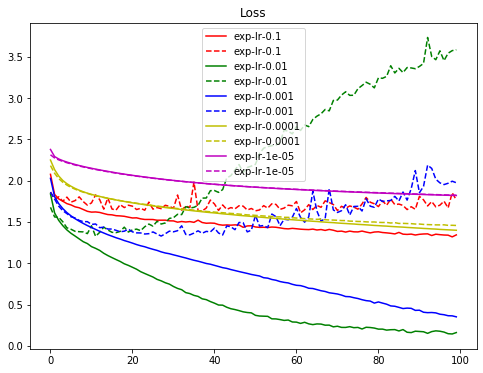

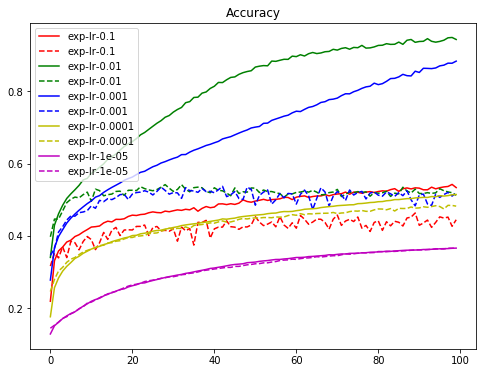

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()